import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\ziggurat\\Desktop\\python for data science\\data.csv")
#df.head()

C:\Users\ziggurat\AppData\Local\Temp\ipykernel_8104\329842089.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\\Users\\ziggurat\\Desktop\\python for data science\\data.csv")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6405008 entries, 0 to 6405007
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 879.6+ MB


In [4]:
#df.describe()

In [5]:
print("میانگین کرایه :", round(df["fare_amount"].mean(), 3))
print('---------------------')
print("میانگین مسافت :", df["trip_distance"].mean())
print('---------------------')
print("بیشترین کرایه :", df["fare_amount"].max())

میانگین کرایه : 12.694
---------------------
میانگین مسافت : 2.9296439333096878
---------------------
بیشترین کرایه : 4265.0


In [6]:
corr = df['trip_distance'].corr(df['fare_amount'])
print("میزان همبستگی بین کرایه و مسافت:", corr)

میزان همبستگی بین کرایه و مسافت: 0.039618727933465506


In [7]:
#همبستگی ماتریسی بین چندستون
matrix_corr = df[["passenger_count", "trip_distance", "fare_amount", "tip_amount", "tolls_amount"]].corr()
matrix_corr

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
passenger_count,1.000000,0.010643,0.006597,-0.001021,0.004097
trip_distance,0.010643,1.000000,0.039619,0.022724,0.025151
fare_amount,0.006597,0.039619,1.000000,0.528920,0.526764
tip_amount,-0.001021,0.022724,0.528920,1.000000,0.381791
tolls_amount,0.004097,0.025151,0.526764,0.381791,1.000000


<Axes: >

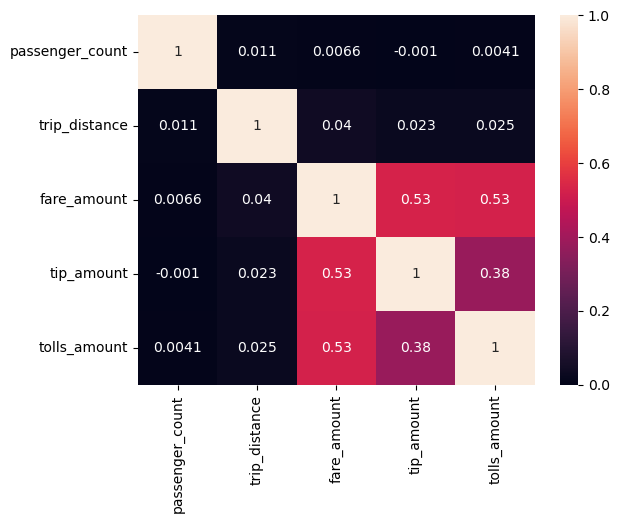

In [8]:
sns.heatmap(matrix_corr, annot=True)

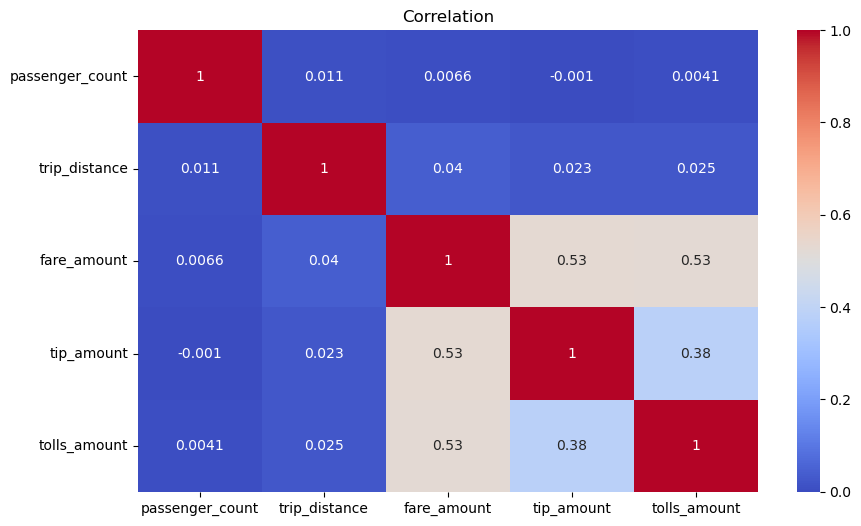

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(matrix_corr, annot=True, cmap="coolwarm")
plt.title("Correlation")
plt.show()

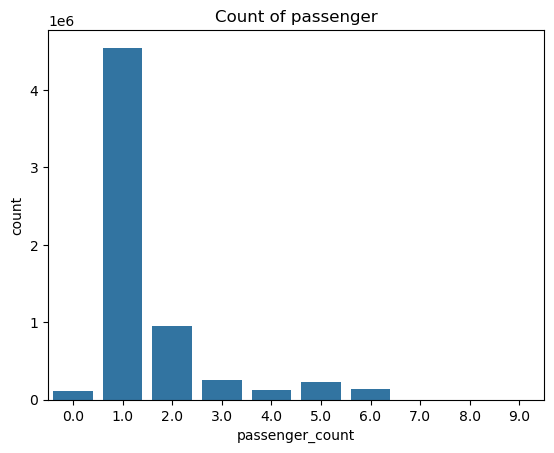

In [10]:
sns.countplot(df, x="passenger_count")
plt.title("Count of passenger")
plt.show()

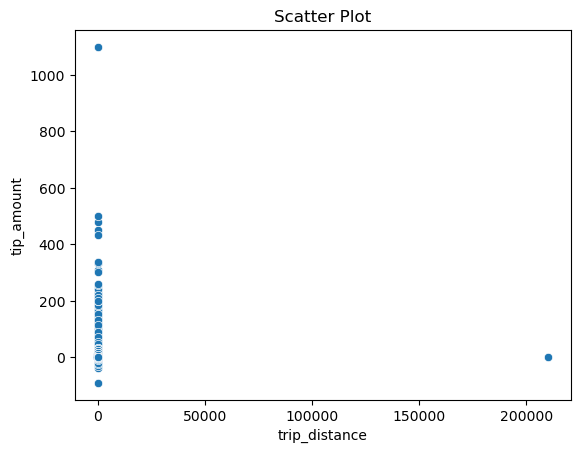

In [11]:
sns.scatterplot(df, x='trip_distance', y='tip_amount')
plt.title('Scatter Plot')
plt.show()

In [15]:
df['tpep_dropoff_datetime'] = pd.to_datetime(df["tpep_dropoff_datetime"])
df['tpep_pickup_datetime'] = pd.to_datetime(df["tpep_pickup_datetime"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6405008 entries, 0 to 6405007
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               float64       
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           float64       
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  passenger_number      

In [16]:
df["duration_minutes"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]).dt.total_seconds() / 60
# df.head()

In [17]:
df["speed"] = df["trip_distance"] / df["duration_minutes"]
#df.head()

In [16]:
# sns.boxplot(df, x="pickup_location", y="speed")

<Axes: xlabel='payment_type', ylabel='fare_amount'>

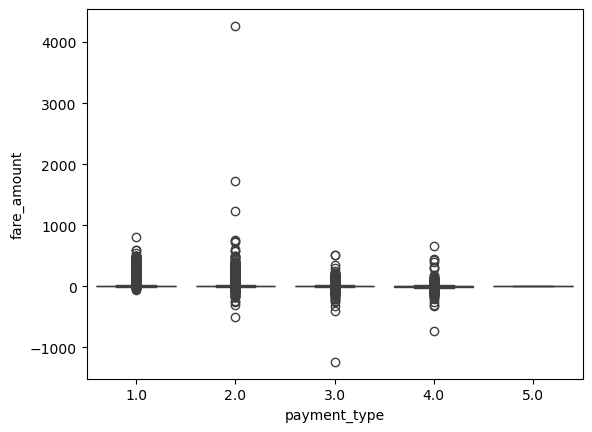

In [17]:
sns.boxplot(df, x="payment_type", y="fare_amount")

In [4]:
#df["pickup_location"].value_counts().plot(kind="bar")

In [6]:
# avr_tips = df.groupby("pickup_location")["tip_amount"].mean().sort_values(ascending=False)
# avr_tips

In [7]:
high_fare = df[df["total_amount"] > 50]
high_fare

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
69,2.0,2020-01-01 00:42:15,2020-01-01 01:16:20,1.0,14.52,1.0,N,185,226,1.0,41.00,0.50,0.5,8.46,0.00,0.3,52.71,0.0
84,2.0,2020-01-01 00:44:37,2020-01-01 01:46:33,1.0,6.70,1.0,N,50,7,1.0,38.50,0.50,0.5,8.46,0.00,0.3,50.76,2.5
179,1.0,2020-01-01 00:39:40,2020-01-01 01:03:26,2.0,13.70,1.0,N,262,134,1.0,38.50,3.00,0.5,12.10,6.12,0.3,60.52,2.5
219,2.0,2020-01-01 00:56:32,2020-01-01 01:13:53,1.0,11.85,2.0,N,93,263,1.0,52.00,0.00,0.5,12.28,6.12,0.3,73.70,2.5
223,2.0,2020-01-01 00:24:13,2020-01-01 00:57:38,1.0,15.69,1.0,N,138,153,1.0,44.00,0.50,0.5,10.28,6.12,0.3,61.70,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6404998,NaN,2020-01-31 22:43:19,2020-01-31 23:14:48,NaN,16.32,NaN,NaN,242,36,NaN,48.96,2.75,0.0,0.00,6.12,0.3,58.13,0.0
6405002,NaN,2020-01-31 22:41:00,2020-01-31 23:17:00,NaN,16.67,NaN,NaN,48,64,NaN,45.66,5.50,0.5,0.00,6.12,0.3,58.08,0.0
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0


In [8]:
df["passenger_number"] = df["passenger_count"]
df.rename(columns={"passenger_count": "passenger_number"})
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,passenger_number
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5,1.0
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5,1.0
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5,1.0
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0,1.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0,NaN
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0,NaN
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0,NaN
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0,NaN


In [9]:
df[df["passenger_count"] == 1]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,passenger_number
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,1.0
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,1.0
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,1.0
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,1.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339562,2.0,2020-01-31 23:38:07,2020-01-31 23:52:21,1.0,2.10,1.0,N,163,246,1.0,11.0,0.5,0.5,2.96,0.0,0.3,17.76,2.5,1.0
6339563,2.0,2020-01-31 23:00:18,2020-01-31 23:19:18,1.0,2.13,1.0,N,164,79,1.0,13.0,0.5,0.5,3.36,0.0,0.3,20.16,2.5,1.0
6339564,2.0,2020-01-31 23:24:22,2020-01-31 23:40:39,1.0,2.55,1.0,N,79,68,1.0,12.5,0.5,0.5,3.26,0.0,0.3,19.56,2.5,1.0
6339565,2.0,2020-01-31 23:44:22,2020-01-31 23:54:00,1.0,1.61,1.0,N,100,142,2.0,8.5,0.5,0.5,0.00,0.0,0.3,12.30,2.5,1.0


<Axes: xlabel='fare_amount', ylabel='Count'>

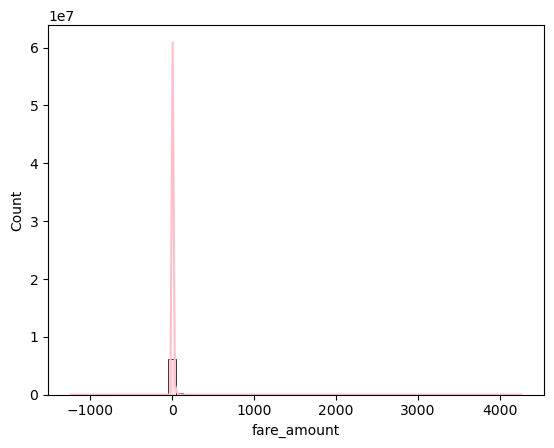

In [10]:
sns.histplot(df["fare_amount"], bins=60, color="pink", kde=True)

In [20]:
df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,passenger_number,duration_minutes,speed,pickup_hour
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,...,0.5,1.47,0.00,0.3,11.27,2.5,1.0,4.800000,0.250000,0
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,...,0.5,1.50,0.00,0.3,12.30,2.5,1.0,7.416667,0.161798,0
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,...,0.5,1.00,0.00,0.3,10.80,2.5,1.0,6.183333,0.097035,0
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,...,0.5,1.36,0.00,0.3,8.16,0.0,1.0,4.850000,0.164948,0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,...,0.5,0.00,0.00,0.3,4.80,0.0,1.0,2.300000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,...,0.5,0.00,0.00,0.3,21.14,0.0,NaN,31.000000,0.104516,22
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,...,0.5,0.00,12.24,0.3,62.46,0.0,NaN,76.000000,0.291184,22
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,...,0.0,0.00,0.00,0.3,51.90,0.0,NaN,27.833333,0.377605,22
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,...,0.0,0.00,0.00,0.3,30.22,0.0,NaN,22.650000,0.242384,22


C:\Users\ziggurat\AppData\Local\Temp\ipykernel_8104\237288630.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x="pickup_hour", palette="coolwarm")


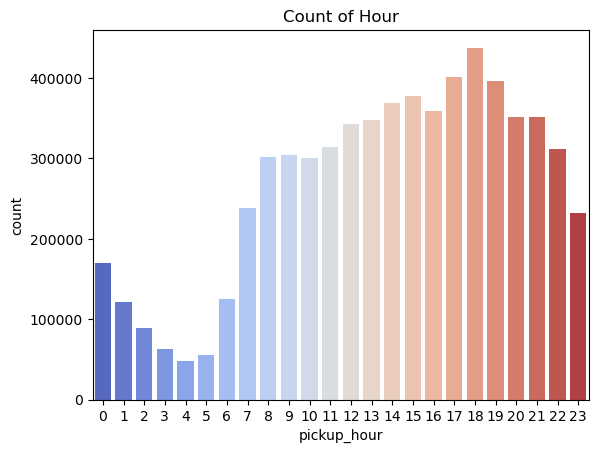

In [21]:
sns.countplot(df, x="pickup_hour", palette="coolwarm")
plt.title("Count of Hour")
plt.show()

In [22]:
total_incom = df["total_amount"].sum()
total_incom

119537617.35000002

In [23]:
total_tip = df["tip_amount"].sum()
total_tip

14022751.94000001

In [24]:
df["payment_type"]= df["payment_type"].replace({"Cash": 0, "App Payment": 1, "Credit Card": 2})
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,passenger_number,duration_minutes,speed,pickup_hour
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,...,0.5,1.47,0.00,0.3,11.27,2.5,1.0,4.800000,0.250000,0
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,...,0.5,1.50,0.00,0.3,12.30,2.5,1.0,7.416667,0.161798,0
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,...,0.5,1.00,0.00,0.3,10.80,2.5,1.0,6.183333,0.097035,0
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,...,0.5,1.36,0.00,0.3,8.16,0.0,1.0,4.850000,0.164948,0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,...,0.5,0.00,0.00,0.3,4.80,0.0,1.0,2.300000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,...,0.5,0.00,0.00,0.3,21.14,0.0,NaN,31.000000,0.104516,22
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,...,0.5,0.00,12.24,0.3,62.46,0.0,NaN,76.000000,0.291184,22
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,...,0.0,0.00,0.00,0.3,51.90,0.0,NaN,27.833333,0.377605,22
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,...,0.0,0.00,0.00,0.3,30.22,0.0,NaN,22.650000,0.242384,22


In [25]:
df['payment_type'].corr(df["tip_amount"])

-0.45595715841056567

In [27]:
df.groupby("payment_type")['tip_amount'].mean()

payment_type
1.0    2.985673
2.0    0.000341
3.0   -0.002215
4.0    0.024151
5.0    0.000000
Name: tip_amount, dtype: float64

In [ ]:
sns.pairplot(df, hue="payment_type")